In [1]:
import numpy as np
import cv2
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt


In [2]:
img = cv2.imread('../image/girl.png')

cv2.imshow('girl',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# shape predictor 
shape_predictor = dlib.shape_predictor('../models/shape_predictor_68_face_landmarks.dat')
# face descriptor
shape_descriptor = dlib.face_recognition_model_v1('../models/dlib_face_recognition_resnet_model_v1.dat')


[[113 249]
 [112 281]
 [115 314]
 [122 345]
 [135 375]
 [154 401]
 [177 424]
 [203 442]
 [231 447]
 [260 443]
 [286 426]
 [308 404]
 [324 378]
 [336 348]
 [343 316]
 [347 282]
 [346 251]
 [123 223]
 [138 210]
 [161 208]
 [184 211]
 [205 220]
 [241 220]
 [263 211]
 [288 208]
 [313 210]
 [333 222]
 [224 248]
 [225 272]
 [225 295]
 [225 319]
 [201 337]
 [213 340]
 [226 343]
 [239 340]
 [252 336]
 [144 248]
 [158 239]
 [174 240]
 [188 254]
 [172 255]
 [155 254]
 [263 254]
 [276 240]
 [293 238]
 [309 247]
 [295 254]
 [277 255]
 [185 377]
 [200 370]
 [215 364]
 [226 367]
 [237 364]
 [254 370]
 [273 377]
 [255 392]
 [239 399]
 [227 400]
 [215 399]
 [200 391]
 [193 378]
 [215 378]
 [227 380]
 [238 378]
 [266 378]
 [238 381]
 [227 382]
 [215 380]]


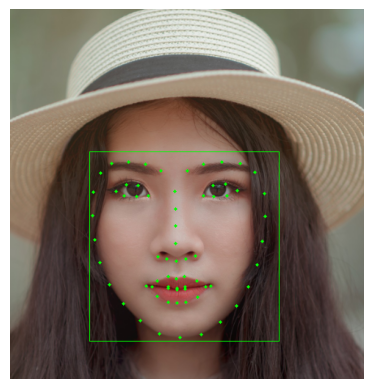

In [4]:
# step -1: Face detection
image = img.copy()
face_detector = dlib.get_frontal_face_detector()

faces = face_detector(image)
for box in faces:
    pt1 = box.left(),box.top()
    pt2 = box.right(), box.bottom()
    
    face_shape = shape_predictor(image,box)
    face_shape_array = face_utils.shape_to_np(face_shape)
    face_descriptor = shape_descriptor.compute_face_descriptor(image,face_shape)
    print(face_shape_array)
    for points in face_shape_array:
        cv2.circle(image,tuple(points),2,(0,255,0),-1)
    
    cv2.rectangle(image,pt1,pt2,(0,255,0))

#cv2.imshow('girl face detection',image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [5]:
len(np.array(face_descriptor))

128